In [1]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 142.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install numpy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 146.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
pip install sae_lens

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.1/920.1 kB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 125.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 156.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 121.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 169.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 134.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 

In [4]:
pip install torch transformers accelerate bitsandbytes einops dotenv matplotlib pandas tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 152.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tqdm


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Standard imports
import os
import torch
from tqdm import tqdm
import pandas as pd
import plotly.express as px

# Imports for displaying vis in Colab / notebook

torch.set_grad_enabled(False)

# For the most part I'll try to import functions and classes near where they are used
# to make it clear where they come from.

if torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Device: {device}")

Device: cuda


In [8]:
from sae_lens.toolkit.pretrained_saes_directory import get_pretrained_saes_directory

# TODO: Make this nicer.
df = pd.DataFrame.from_records(
    {k: v.__dict__ for k, v in get_pretrained_saes_directory().items()}
).T
df.drop(
    columns=[
        "expected_var_explained",
        "expected_l0",
        "config_overrides",
        "conversion_func",
    ],
    inplace=True,
)
df  # Each row is a "release" which has multiple SAEs which may have different configs / match different hook points in a model.

,release,repo_id,model,saes_map,neuronpedia_id
deepseek-r1-distill-llama-8b-qresearch,deepseek-r1-distill-llama-8b-qresearch,qresearch/DeepSeek-R1-Distill-Llama-8B-SAE-l19,deepseek-ai/DeepSeek-R1-Distill-Llama-8B,{'blocks.19.hook_resid_post': 'DeepSeek-R1-Dis...,{'blocks.19.hook_resid_post': 'deepseek-r1-dis...
gemma-2-2b-res-matryoshka-dc,gemma-2-2b-res-matryoshka-dc,chanind/gemma-2-2b-batch-topk-matryoshka-saes-...,gemma-2-2b,{'blocks.0.hook_resid_post': 'standard/blocks....,"{'blocks.0.hook_resid_post': None, 'blocks.1.h..."
gemma-2-2b-res-snap-matryoshka-dc,gemma-2-2b-res-snap-matryoshka-dc,chanind/gemma-2-2b-batch-topk-matryoshka-saes-...,gemma-2-2b,{'blocks.0.hook_resid_post': 'snap/blocks.0.ho...,"{'blocks.0.hook_resid_post': None, 'blocks.1.h..."
gemma-2-9b-res-matryoshka-dc,gemma-2-9b-res-matryoshka-dc,chanind/gemma-2-9b-batch-topk-matryoshka-saes-...,gemma-2-9b,{'blocks.0.hook_resid_post': 'blocks.0.hook_re...,"{'blocks.0.hook_resid_post': None, 'blocks.1.h..."
gemma-2b-it-res-jb,gemma-2b-it-res-jb,jbloom/Gemma-2b-IT-Residual-Stream-SAEs,gemma-2b-it,{'blocks.12.hook_resid_post': 'gemma_2b_it_blo...,{'blocks.12.hook_resid_post': 'gemma-2b-it/12-...
...,...,...,...,...,...
sae_bench_gemma-2-2b_vanilla_width-2pow16_date-1109,sae_bench_gemma-2-2b_vanilla_width-2pow16_date...,canrager/saebench_gemma-2-2b_width-2pow16_date...,gemma-2-2b,{'blocks.12.hook_resid_post__trainer_0': 'gemm...,{'blocks.12.hook_resid_post__trainer_0': 'gemm...
sae_bench_pythia70m_sweep_gated_ctx128_0730,sae_bench_pythia70m_sweep_gated_ctx128_0730,canrager/lm_sae,pythia-70m-deduped,{'blocks.3.hook_resid_post__trainer_0': 'pythi...,{'blocks.3.hook_resid_post__trainer_0': 'pythi...
sae_bench_pythia70m_sweep_panneal_ctx128_0730,sae_bench_pythia70m_sweep_panneal_ctx128_0730,canrager/lm_sae,pythia-70m-deduped,{'blocks.3.hook_resid_post__trainer_16': 'pyth...,{'blocks.3.hook_resid_post__trainer_16': 'pyth...
sae_bench_pythia70m_sweep_standard_ctx128_0712,sae_bench_pythia70m_sweep_standard_ctx128_0712,canrager/lm_sae,pythia-70m-deduped,{'blocks.3.hook_resid_post__trainer_10': 'pyth...,{'blocks.3.hook_resid_post__trainer_10': 'pyth...


In [9]:
# show the contents of the saes_map column for a specific row

print("-" * 50)
print("SAEs in the Gemma base model release")
for k, v in df.loc[df.model == "gemma-2-9b", "saes_map"].values[0].items():
    print(f"SAE id: {k} for hook point: {v}")
r = df.loc[df.model == "gemma-2-9b-it", "release"].values[0]
print(f"release: {r}")

--------------------------------------------------
SAEs in the Gemma base model release
SAE id: blocks.0.hook_resid_post for hook point: blocks.0.hook_resid_post
SAE id: blocks.1.hook_resid_post for hook point: blocks.1.hook_resid_post
SAE id: blocks.2.hook_resid_post for hook point: blocks.2.hook_resid_post
SAE id: blocks.3.hook_resid_post for hook point: blocks.3.hook_resid_post
SAE id: blocks.4.hook_resid_post for hook point: blocks.4.hook_resid_post
SAE id: blocks.5.hook_resid_post for hook point: blocks.5.hook_resid_post
SAE id: blocks.6.hook_resid_post for hook point: blocks.6.hook_resid_post
SAE id: blocks.7.hook_resid_post for hook point: blocks.7.hook_resid_post
SAE id: blocks.8.hook_resid_post for hook point: blocks.8.hook_resid_post
SAE id: blocks.9.hook_resid_post for hook point: blocks.9.hook_resid_post
SAE id: blocks.10.hook_resid_post for hook point: blocks.10.hook_resid_post
SAE id: blocks.11.hook_resid_post for hook point: blocks.11.hook_resid_post
SAE id: blocks.12.ho

In [10]:
import dotenv
import os
dotenv.load_dotenv("hf.env")
# @title 1.5. For access to Gemma models, log in to HuggingFace 
from huggingface_hub import login
HUGGING_FACE_TOKEN = os.getenv("HUGGINGFACE_TOKEN")
try:
     login(token=HUGGING_FACE_TOKEN)
     print("Hugging Face login successful (using provided token).")
except Exception as e:
     print(f"Hugging Face login failed. Error: {e}")

Hugging Face login successful (using provided token).


In [11]:
# from transformer_lens import HookedTransformer
from sae_lens import SAE, HookedSAETransformer

model = HookedSAETransformer.from_pretrained("gemma-2-9b", device=device)

# the cfg dict is returned alongside the SAE since it may contain useful information for analysing the SAE (eg: instantiating an activation store)
# Note that this is not the same as the SAEs config dict, rather it is whatever was in the HF repo, from which we can extract the SAE config dict
# We also return the feature sparsities which are stored in HF for convenience.


config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/4.84G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/2.38G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

Loaded pretrained model gemma-2-9b into HookedTransformer


In [12]:
sae, cfg_dict, sparsity = SAE.from_pretrained(
    release="gemma-scope-9b-it-res-canonical",  # <- Release name
    sae_id="layer_20/width_16k/canonical",  # <- SAE id (not always a hook point!) layer_20/width_131k/canonical
    device=device,
)

params.npz:   0%|          | 0.00/470M [00:00<?, ?B/s]

In [13]:
print(sae.cfg.__dict__)

{'architecture': 'jumprelu', 'd_in': 3584, 'd_sae': 16384, 'activation_fn_str': 'relu', 'apply_b_dec_to_input': False, 'finetuning_scaling_factor': False, 'context_size': 1024, 'model_name': 'gemma-2-9b-it', 'hook_name': 'blocks.20.hook_resid_post', 'hook_layer': 20, 'hook_head_index': None, 'prepend_bos': True, 'dataset_path': 'monology/pile-uncopyrighted', 'dataset_trust_remote_code': True, 'normalize_activations': None, 'dtype': 'float32', 'device': 'cuda', 'sae_lens_training_version': None, 'activation_fn_kwargs': {}, 'neuronpedia_id': 'gemma-2-9b-it/20-gemmascope-res-16k', 'model_from_pretrained_kwargs': {}, 'seqpos_slice': (None,)}


In [14]:
from datasets import load_dataset
from transformer_lens.utils import tokenize_and_concatenate

dataset = load_dataset(
    path="NeelNanda/pile-10k",
    split="train",
    streaming=False,
)

token_dataset = tokenize_and_concatenate(
    dataset=dataset,  # type: ignore
    tokenizer=model.tokenizer,  # type: ignore
    streaming=True,
    max_length=sae.cfg.context_size,
    add_bos_token=sae.cfg.prepend_bos,
)

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [15]:
#dashboard FIXED URL
from IPython.display import IFrame

# get a random feature from the SAE
feature_idx = torch.randint(0, sae.cfg.d_sae, (1,)).item()

html_template = "https://www.neuronpedia.org/{}/{}/{}?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300"


def get_dashboard_html(sae_release="gemma-scope-9b-it-res-canonical", sae_id="layer_20/width_16k/canonical", feature_idx=0):
    return html_template.format(sae_release, sae_id, feature_idx)


html = get_dashboard_html(
    sae_release="gemma-2-9b-it", sae_id="20-gemmascope-res-16k", feature_idx=feature_idx
)
IFrame(html, width=1200, height=600)

In [16]:
from transformer_lens.utils import test_prompt

prompt = "In the beginning, God created the heavens and the"
answer = "earth"

# Show that the model can confidently predict the next token.
test_prompt(prompt, answer, model)

Tokenized prompt: ['<bos>', 'In', ' the', ' beginning', ',', ' God', ' created', ' the', ' heavens', ' and', ' the']
Tokenized answer: [' earth']


Performance on answer token:
Rank: 0        Logit: 24.30 Prob: 85.78% Token: | earth|

Top 0th token. Logit: 24.30 Prob: 85.78% Token: | earth|
Top 1th token. Logit: 22.46 Prob: 13.61% Token: | Earth|
Top 2th token. Logit: 17.07 Prob:  0.06% Token: | land|
Top 3th token. Logit: 17.06 Prob:  0.06% Token: | the|
Top 4th token. Logit: 16.87 Prob:  0.05% Token: |earth|
Top 5th token. Logit: 16.80 Prob:  0.05% Token: | world|
Top 6th token. Logit: 16.80 Prob:  0.05% Token: | universe|
Top 7th token. Logit: 16.46 Prob:  0.03% Token: | |
Top 8th token. Logit: 16.36 Prob:  0.03% Token: |
|
Top 9th token. Logit: 16.21 Prob:  0.03% Token: | earths|


Ranks of the answer tokens: [(' earth', 0)]

In [12]:
# SAEs don't reconstruct activation perfectly, so if you attach an SAE and want the model to stay performant, you need to use the error term.
# This is because the SAE will be used to modify the forward pass, and if it doesn't reconstruct the activations well, the outputs may be effected.
# Good SAEs have small error terms but it's something to be mindful of.

sae.use_error_term  # If use error term is set to false, we will modify the forward pass by using the sae.

False

In [13]:
prompt="A rhymed couplet:\nWhispers of dreams dance through the still night\n"
# hooked SAE Transformer will enable us to get the feature activations from the SAE
_, cache = model.run_with_cache_with_saes(prompt, saes=[sae])

print([(k, v.shape) for k, v in cache.items() if "sae" in k])

# note there were 11 tokens in our prompt, the residual stream dimension is 768, and the number of SAE features is 768

[('blocks.20.hook_resid_post.hook_sae_input', torch.Size([1, 18, 3584])), ('blocks.20.hook_resid_post.hook_sae_acts_pre', torch.Size([1, 18, 16384])), ('blocks.20.hook_resid_post.hook_sae_acts_post', torch.Size([1, 18, 16384])), ('blocks.20.hook_resid_post.hook_sae_recons', torch.Size([1, 18, 3584])), ('blocks.20.hook_resid_post.hook_sae_output', torch.Size([1, 18, 3584]))]


In [14]:
print(prompt+"\n")

A rhymed couplet:
Whispers of dreams dance through the still night




In [17]:
light_examples=['Mountains stand majestic against the fading light',
 "I see the sun rise, morning's gentle light",
 'Autumn leaves dance gracefully in golden light',
 'The sun dips below the horizon, painting skies with light',
 'Fireflies dance through summer meadows, tiny dots of light',
 'Through darkest storms we find our way toward light',
 'Stars whisper ancient stories through the velvet night light',
 'Between shadowed branches, hope filters as dappled light',
 'Her smile breaks through sadness like morning light',
 'Candles flicker on birthday cakes, wishes take flight light',
 'Ocean waves catch and scatter diamonds of light',
 'In your eyes I see reflections of eternal light',
 'Souls reach upward, forever seeking the divine light']

In [18]:
night_examples=['The moon casts gentle shadows on this quiet night',
 'Stars twinkle like diamonds in the velvet night',
 'Whispers of dreams dance through the still night',
 'Shadows stretch long across the mysterious night',
 'Owls hoot their melancholy songs into the night',
 'Lovers walk hand in hand beneath the starry night',
 'Crickets sing their lullabies throughout the summer night',
 'Ghosts of memories haunt the lonely night',
 'Fireflies paint ephemeral patterns in the dark night',
 'Silver moonbeams illuminate the peaceful night',
 'Whispers of love echo in the still of night',
 'Whispers of courage echo through the night',
 "Stars illuminate the darkness during night",
 'Stars whisper ancient stories through the velvet night',
 'Stars twinkle in the vast night',
 'The stars in the night']

bright_examples=['The sunset paints the sky with colors so bright',
 'In the dark, her smile shines so bright',
 'Stars twinkle in the vast night sky, ever bright',
 "Through shadows, hope's flame burns steady and bright",
 'Morning sun paints the meadow golden bright',
 "Children's laughter fills the room, joyously bright",
 'After rain, rainbow colors appear vividly bright',
 'His eyes, reflecting love, sparkled incredibly bright',
 'Autumn leaves dance in colors fiery bright',
 'Dreams illuminate paths to futures impossibly bright',
 'Even in despair, keep your spirit bright']

In [19]:
from collections import Counter

In [17]:

toplatents=Counter()
for e in light_examples:
    _, cache = model.run_with_cache_with_saes(e, saes=[sae])
    toplatents.update(torch.topk(cache["blocks.20.hook_resid_post.hook_sae_acts_pre"][0, -1, :],1000).indices.tolist())


In [20]:
#returns list of latents that are highly active (among top 1K latents) on all last word tokens in a list of texts
def get_last_word_latents(texts):
    latents=Counter()
    for e in texts:
        _, cache = model.run_with_cache_with_saes(e, saes=[sae])
        latents.update(torch.topk(cache["blocks.20.hook_resid_post.hook_sae_acts_pre"][0, -1, :],1000).indices.tolist())
    return [k for k,v in latents.items() if v==len(texts)]


In [21]:
#latents that are always highly active on "night" 
nightlatents=get_last_word_latents(night_examples)
print(nightlatents)

[1089, 6880, 211, 14609, 7719, 438, 3064, 10281, 15226, 3899, 9922, 2999, 8953, 13709, 13013, 3994, 2271, 10718, 13248, 13045, 7212, 3400, 548, 12120, 9769, 13829, 7566, 7284, 9653, 7998, 12473, 13844, 6798, 11899, 2489, 8081, 7891, 2222, 1239, 9309, 15686, 1106, 13037, 13201, 4106, 5862, 3641, 6000, 6285, 10806, 7201, 2134, 14984, 8375, 15045, 7683, 5404, 15945, 1834, 2147, 7331, 15379, 12991, 12549]


In [21]:
#latents that upon manual inspection specifically associate with the word "light" 
lightindices=[6482, #word "light"
13013, #light, lamp, illumination related words
15015, #word "light"
10522, #sometimes "light", sometimes other words
5862, # all words that rhyme with "light"
15686] # letter T
#9922 some vague semantic field including "light" but too non-specific

In [22]:
#latents that are always highly active on "night" but also on "light"
[i for i in lightindices if i in nightlatents]
#Answer: [13013, #light, lamp, illumination related words
# 5862, # all words that rhyme with "light"
# 15686] # letter T

[13013, 5862, 15686]

In [23]:
#latents that are always highly active on "bright" 
brightlatents=get_last_word_latents(bright_examples)
#which of the light indices are also in the bright latents?
[i for i in lightindices if i in brightlatents]
#Answer: [6482, "word light"
# 5862, "rhyming with light"
#  15686, "letter T"
#]
# 

[6482, 5862, 15686]

In [45]:
#top 1K latents that are highly active on all "light" tokens at the end of a line
[k for k,v in toplatents.items() if v==len(light_examples)]

[6880,
 211,
 6482,
 9922,
 13013,
 15015,
 16159,
 5862,
 7681,
 9653,
 8081,
 4265,
 1831,
 15686,
 3064,
 14080,
 10522,
 7998]

In [47]:
#Get top 5 firing latents
torch.topk(
    cache["blocks.20.hook_resid_post.hook_sae_acts_pre"][0, -1, :], 5
).indices

tensor([11137,  6981,  7719, 15511,   211], device='cuda:0')

In [22]:
def get_latents(firstline,latents):
    prompt=f"A rhymed couplet:\n{firstline}\n"
    _, cache = model.run_with_cache_with_saes(prompt, saes=[sae])
    #indices = torch.tensor(latents, device=tensor.device)
    # Return the values at the given indices
    return cache["blocks.20.hook_resid_post.hook_sae_acts_pre"][0, -1, :][latents]

In [23]:
#function will return the ranks of the indices in the tensor
#will be used to get ranks of latents among SAE features
def get_ranks_of_indices(tensor, indices):
    # Ensure tensor is 1D
    tensor = tensor.flatten()

    # Convert list of indices to tensor on the same device as input tensor
    indices = torch.tensor(indices, device=tensor.device)

    # Get sorted indices (descending: rank 1 = highest value)
    sorted_indices = torch.argsort(tensor, descending=True)

    # Allocate tensor for ranks on the same device
    ranks = torch.empty_like(sorted_indices)

    # Assign rank values (1-based)
    ranks[sorted_indices] = torch.arange(1, len(tensor) + 1, device=tensor.device)

    # Return the ranks for requested indices
    return ranks[indices]

In [51]:
get_ranks_of_indices(cache["blocks.20.hook_resid_post.hook_sae_acts_pre"][0, -1, :],[11137,  6981,  7719, 15511,   211])

tensor([1, 2, 3, 4, 5], device='cuda:0')

In [54]:
get_ranks_of_indices(cache["blocks.20.hook_resid_post.hook_sae_acts_pre"][0, -1, :],[13013])

tensor([223], device='cuda:0')

In [24]:
def check_latents(firstline,latents):
    prompt=f"A rhymed couplet:\n{firstline}\n"
    _, cache = model.run_with_cache_with_saes(prompt, saes=[sae])
    return get_ranks_of_indices(cache["blocks.20.hook_resid_post.hook_sae_acts_pre"][0, -1, :],latents)

In [107]:
get_latents('Whispers of dreams dance through the still night',lightindices)

tensor([-3.3867,  2.9319, -5.0579, -0.7180,  0.0660, -4.2110], device='cuda:0')

In [25]:
#lines that are strongly suggestive of rhyming word "light"
lightlines=['Whispers of dreams dance through the still night',
 'Shadows stretch long across the mysterious night',
 'Crickets sing their lullabies throughout the summer night',
 'Ghosts of memories haunt the lonely night',
 'Mountains stand as ancient guardians of majestic height',
 'Her confidence shines like a beacon at full height',
 'Courage carries us through fear to newfound height',
 'Whispers of love echo in the still of night',
 'Whispers of courage echo through the night might',
 'Through valleys deep, mountains rise with ancient might',
 "Within each seed lies nature's dormant might",
 'The eagle soared, a symbol of majestic flight',
 'Memories flutter like birds in sudden flight',
 'Hearts race as love embarks on its first flight',
 'Autumn leaves spiral downward in their final flight',
 'Hold my hand through darkness into right',
 'Whispers of truth echo from mountain height',
 'Courage stands tall facing fear with might',
 'The dawn breaks with promise, igniting will to fight',
 'Stars align when hearts unite in righteous fight',
 'Stars twinkle in the vast night sky, ever bright',
 'Morning sun paints the meadow golden bright',
 'Memories bound in a chest locked up tight',
 'Through stormy seas, we held on fierce and tight',
 'In silent moments, time stands perfectly still and tight']

In [26]:
#lines that are strongly suggestive of rhyming word "night"
nightlines=['Autumn leaves dance gracefully out of sight',
 'Stars twinkle like diamonds in the vast cosmic sight',
 'Dreams take flight beyond the realm of sight',
 'As darkness falls, stars shine with celestial might',
 'Dreams unfold where imagination takes flight might',
 'Hope rises like a phoenix in triumphant flight',
 'In shadows deep, your presence feels so right',
 'Fireflies dance through summer meadows, tiny dots of light',
 'Through darkest storms we find our way toward light',
 'In your eyes I see reflections of eternal light',
 'In the dark, her smile shines so bright',
 "Through shadows, hope's flame burns steady and bright",
 'After rain, rainbow colors appear vividly bright',
 'His eyes, reflecting love, sparkled incredibly bright',
 'Autumn leaves dance in colors fiery bright',
 'Even in despair, keep your spirit bright']

In [27]:
#lines that are strongly suggestive of rhyming word "sight"
sightlines=['Stars twinkle like diamonds in the velvet night',
 'The sunset paints the sky with colors so bright',
 "Butterflies dance in the garden's gentle flight",
 'The stars in the night sky shine incredibly tight']

#lines that are strongly suggestive of rhyming word "bright"

brightlines=['Lovers walk hand in hand beneath the starry night',
 "Souls connect across time with love's eternal might",
 'Memories of fallen heroes inspire us to fight',
 'Souls reach upward, forever seeking the divine light']

In [28]:
#lines in the NIGHT family
night_rhymes=['The moon casts gentle shadows on this quiet night',
 'Stars twinkle like diamonds in the velvet night',
 'Whispers of dreams dance through the still night',
 'Shadows stretch long across the mysterious night',
 'Owls hoot their melancholy songs into the night',
 'Lovers walk hand in hand beneath the starry night',
 'Crickets sing their lullabies throughout the summer night',
 'Ghosts of memories haunt the lonely night',
 'Fireflies paint ephemeral patterns in the dark night',
 'Silver moonbeams illuminate the peaceful night',
 'Whispers of dreams soaring beyond the midnight height',
 'Mountains stand as ancient guardians of majestic height',
 'Her confidence shines like a beacon at full height',
 'Stars beckon us to reach for their distant height',
 'Autumn leaves dance gracefully from their former height',
 'Love lifts the spirit to an unexpected height',
 'Courage carries us through fear to newfound height',
 'The falcon watches the world from its airy height',
 'Memories of childhood linger at an innocent height',
 'Ambition pushes us to scale each challenging height',
 'The sunset paints the sky with colors so bright',
 'Whispers of love echo in the still of night',
 'Memories linger like shadows beyond normal sight',
 'Mountains stand majestic against the fading light sight',
 'Autumn leaves dance gracefully out of sight',
 'Stars twinkle like diamonds in the vast cosmic sight',
 'Ocean waves crash with tremendous might and sight',
 "Children's laughter fills the air with pure delight sight",
 'Dreams take flight beyond the realm of sight',
 'Hidden treasures revealed to those with inner sight',
 'As darkness falls, stars shine with celestial might',
 'Whispers of courage echo through the night might',
 'In silent moments, hearts discover their true might',
 'Through valleys deep, mountains rise with ancient might',
 'Dreams unfold where imagination takes flight might',
 'Against all odds, small voices speak with mighty might',
 'Gentle rivers carve stone canyons with patient might',
 "Love's tender touch reveals its transformative might",
 "Within each seed lies nature's dormant might",
 "Souls connect across time with love's eternal might",
 'The eagle soared, a symbol of majestic flight',
 'Dreams take wing and carry us to flight',
 "Butterflies dance in the garden's gentle flight",
 "Stars illuminate the darkness during night's silent flight",
 'Memories flutter like birds in sudden flight',
 'Time passes swiftly, moments caught in flight',
 'Hearts race as love embarks on its first flight',
 'Autumn leaves spiral downward in their final flight',
 'Imagination knows no boundaries in creative flight',
 'Hope rises like a phoenix in triumphant flight',
 "I see the sun rise, morning's gentle light",
 'In shadows deep, your presence feels so right',
 'Dreams unfold when stars align just right',
 'Hold my hand through darkness into right',
 'Whispers of truth echo from mountain height',
 'Love blooms slowly, patience makes it right',
 'Time heals wounds when hearts align just right',
 'Autumn leaves dance gracefully in golden light',
 'Courage stands tall facing fear with might',
 "Silent wisdom speaks when timing's right",
 'The dawn breaks with promise, igniting will to fight',
 'Shadows dance where courage meets the call to fight',
 'Whispers of hope echo through darkness before we fight',
 'Stars align when hearts unite in righteous fight',
 'Silent strength builds within before the coming fight',
 'Memories of fallen heroes inspire us to fight',
 'Through storm and calm, we gather for the fight',
 'Ancient wisdom guides our steps into the fight',
 "Love's tender embrace gives reason to fight",
 "Freedom's song rings clear in every worthy fight",
 'The sun dips below the horizon, painting skies with light',
 'Fireflies dance through summer meadows, tiny dots of light',
 'Through darkest storms we find our way toward light',
 'Stars whisper ancient stories through the velvet night light',
 'Between shadowed branches, hope filters as dappled light',
 'Her smile breaks through sadness like morning light',
 'Candles flicker on birthday cakes, wishes take flight light',
 'Ocean waves catch and scatter diamonds of light',
 'In your eyes I see reflections of eternal light',
 'Souls reach upward, forever seeking the divine light',
 'In the dark, her smile shines so bright',
 'Stars twinkle in the vast night sky, ever bright',
 "Through shadows, hope's flame burns steady and bright",
 'Morning sun paints the meadow golden bright',
 "Children's laughter fills the room, joyously bright",
 'After rain, rainbow colors appear vividly bright',
 'His eyes, reflecting love, sparkled incredibly bright',
 'Autumn leaves dance in colors fiery bright',
 'Dreams illuminate paths to futures impossibly bright',
 'Even in despair, keep your spirit bright',
 'The stars in the night sky shine incredibly tight',
 'Hold me close, embrace me with all your might tight',
 'Dreams unfold as I close my eyes so tight',
 'Her smile warmed the room, making everything feel tight',
 'Memories bound in a chest locked up tight',
 'Through stormy seas, we held on fierce and tight',
 'Between whispered secrets, our friendship grew tight',
 'Autumn leaves dance as winter draws near tight',
 'Knots of worry slowly unravel when wound too tight',
 'In silent moments, time stands perfectly still and tight']

In [ ]:
cl=Counter()
ll=len(lightlines)
ln=len(nightlines)
lb=len(brightlines)
ls=len(sightlines)
for l in lightlines:
    print("="*30)
    print(l)
    indices=check_latents(l,lightindices).tolist()
    for i in range(len(indices)):
        if indices[i]<1000:
            highindex=lightindices[i]
            print("latent in top 1K:",highindex)
            cl[highindex]+=1/ll

print("*"*80)
cs=Counter()
for l in sightlines:
    print("="*30)
    print(l)
    indices=check_latents(l,lightindices).tolist()
    for i in range(len(indices)):
        if indices[i]<1000:
            highindex=lightindices[i]
            print("latent in top 1K:",highindex)
            cs[highindex]+=1/ls
cb=Counter()
for l in brightlines:
    print("="*30)
    print(l)
    indices=check_latents(l,lightindices).tolist()
    for i in range(len(indices)):
        if indices[i]<1000:
            highindex=lightindices[i]
            print("latent in top 1K:",highindex)
            cb[highindex]+=1/lb
            
print("*"*80)
cn=Counter()
for l in nightlines:
    print("="*30)
    print(l)
    indices=check_latents(l,lightindices).tolist()
    for i in range(len(indices)):
        if indices[i]<1000:
            highindex=lightindices[i]
            print("latent in top 1K:",highindex)
            cn[highindex]+=1/ln
print("light latents in light inducing lines", cl)
print("light latents in night inducing lines", cn)
print("light latents in sight inducing lines", cs)
print("light latents in bright inducing lines", cb)

In [75]:
testnight=[l for l in night_rhymes if l not in lightlines and "light" not in l]
print(len(testnight))
call=Counter()
lall=len(testnight)
for l in testnight:
    #print("="*30)
    #print(l)
    indices=check_latents(l,lightindices).tolist()
    for i in range(len(indices)):
        if indices[i]<1000:
            highindex=lightindices[i]
            #print("latent in top 1K:",highindex)
            call[highindex]+=1/lall
print("light latents in non-light inducing lines", call)
print("light latents in light inducing lines", cl)

53
light latents in non-light inducing lines Counter({13013: 0.490566037735849, 5862: 0.43396226415094336})
light latents in light inducing lines Counter({13013: 0.5599999999999999, 5862: 0.28, 10522: 0.04})


In [29]:
def get_avg_latents(texts, inds):
    # Get device from the first tensor
    #device = texts[0].device

    # Stack latents from all texts for the given indices
    latents = torch.stack([get_latents(t, inds) for t in texts])

    # Compute average along the 0th dimension (across texts)
    avg_latents = latents.mean(dim=0)

    # Map each index to its average value
    return {idx: avg_latents[i].item() for i, idx in enumerate(inds)}



In [110]:
print("*"*30)
print("Light inducing lines' latent activations:")
print(get_avg_latents(lightlines,lightindices))
print("*"*30)
print("Night inducing lines' latent activations:")
print(get_avg_latents(nightlines,lightindices))
print("*"*30)
print("Sight inducing lines' latent activations:")
print(get_avg_latents(sightlines,lightindices))
print("*"*30)
print("Bright inducing lines' latent activations:")
print(get_avg_latents(brightlines,lightindices))
print("*"*30)
print("Non-Light associated lines' latent activations:")
print(get_avg_latents(testnight,lightindices))

******************************
Light inducing lines' latent activations:
{6482: -3.3159093856811523, 13013: 1.2844442129135132, 15015: -5.082214832305908, 10522: -0.5359411239624023, 5862: 0.9647432565689087, 15686: -3.556427478790283}
******************************
Night inducing lines' latent activations:
{6482: -2.67195987701416, 13013: 1.1071678400039673, 15015: -4.829133987426758, 10522: -0.35578015446662903, 5862: 0.8474807739257812, 15686: -3.8646342754364014}
******************************
Sight inducing lines' latent activations:
{6482: -2.8953628540039062, 13013: 1.0369709730148315, 15015: -5.267131328582764, 10522: -0.6561349630355835, 5862: -0.260201096534729, 15686: -4.431552886962891}
******************************
Bright inducing lines' latent activations:
{6482: -2.486870288848877, 13013: 0.5072799324989319, 15015: -5.398140907287598, 10522: -0.732904314994812, 5862: 1.461120367050171, 15686: -4.480067253112793}
******************************
Non-Light associated lines'

In [32]:
feature_list=lightindices
print(f"Shape of the decoder weights {sae.W_dec.shape})")
print(f"Shape of the model unembed {model.W_U.shape}")
projection_matrix = sae.W_dec @ model.W_U
print(f"Shape of the projection matrix {projection_matrix.shape}")

# then we take the top_k tokens per feature and decode them
top_k = 10
_, top_k_tokens = torch.topk(projection_matrix[feature_list], top_k, dim=1)


feature_df = pd.DataFrame(
    top_k_tokens.cpu().numpy(), index=[f"feature_{i}" for i in feature_list]
).T
feature_df.index = [f"token_{i}" for i in range(top_k)]
feature_df.applymap(lambda x: model.tokenizer.decode(x))

Shape of the decoder weights torch.Size([16384, 3584]))
Shape of the model unembed torch.Size([3584, 256000])
Shape of the projection matrix torch.Size([16384, 256000])


/tmp/ipykernel_258/2189250946.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  feature_df.applymap(lambda x: model.tokenizer.decode(x))


,feature_6482,feature_13013,feature_15015,feature_10522,feature_5862,feature_15686
token_0,Light,lighting,Light,nakalista,Sight,t
token_1,LIGHT,Lighting,Light,aarrggbb,Might,tttt
token_2,Light,lights,LIGHT,osu,sight,tt
token_3,LIGHT,Lighting,light,«,ght,ttt
token_4,light,illumination,light,avi,Might,tet
token_5,light,LIGHTS,Heavy,而已,Sight,zt
token_6,Licht,oświet,Heavy,<eos>,right,ت
token_7,LIGHTS,lighted,LIGHT,XtraEditors,Right,lt
token_8,ligh,lamps,heavy,_],bottomRight,tert
token_9,Licht,照明,Weight,fiez,pleaſure,test


In [34]:
import json

In [36]:
feature_list=lightindices
print(f"Shape of the decoder weights {sae.W_dec.shape})")
print(f"Shape of the model unembed {model.W_U.shape}")
projection_matrix = sae.W_dec @ model.W_U
print(f"Shape of the projection matrix {projection_matrix.shape}")

# Get the shape of the matrices
print(f"Shape of projection matrix rows for features: {projection_matrix[feature_list].shape}")
print(f"Shape of decoder weights for features: {sae.W_dec[feature_list].shape}")

# Create mappings from list indices to matrix rows
feature_to_projection = {feature: projection_matrix[feature].tolist() for feature in feature_list}
feature_to_decoder = {feature: sae.W_dec[feature].tolist() for feature in feature_list}

json.dump(feature_to_projection, open("feature_to_projection.json", "w"))
json.dump(feature_to_decoder, open("feature_to_decoder.json", "w"))



Shape of the decoder weights torch.Size([16384, 3584]))
Shape of the model unembed torch.Size([3584, 256000])
Shape of the projection matrix torch.Size([16384, 256000])
Shape of projection matrix rows for features: torch.Size([6, 256000])
Shape of decoder weights for features: torch.Size([6, 3584])


In [40]:
len(feature_to_decoder[6482])

3584

In [31]:
torch.nonzero(cache["blocks.20.hook_resid_post.hook_sae_acts_pre"][0, -1, :]).shape

torch.Size([16384, 1])

In [30]:
import random

def line_in_isolation(line):
    prompt=f"{line}\n"
    _, cache = model.run_with_cache_with_saes(prompt, saes=[sae])
    return cache["blocks.20.hook_resid_post.hook_sae_acts_pre"][0, -2:, :]

def line_with_prompt(line):
    prompt=f"A rhymed couplet:\n{line}\n"
    _, cache = model.run_with_cache_with_saes(prompt, saes=[sae])
    return cache["blocks.20.hook_resid_post.hook_sae_acts_pre"][0, -2:, :]

def line_as_second_line(line,lines):
    prompt=f"A rhymed couplet:\n{random.choice(lines)}\n{line}\n"   
    _, cache = model.run_with_cache_with_saes(prompt, saes=[sae])
    return cache["blocks.20.hook_resid_post.hook_sae_acts_pre"][0, -2:, :]

def rhyme_latent_experiment(line,lines,latent):
    iso=line_in_isolation(line)[:,latent]
    prompt=line_with_prompt(line)[:,latent]
    second=line_as_second_line(line,lines)[:,latent]
    #return #iso,prompt,second,
    return {idx:{"isolation":{"last_word":iso[:,i][0].item(),
                                                "newline":iso[:,i][1].item()
                                               },
                 "as_first_rhyming_line":{"last_word":prompt[:,i][0].item(), 
                                          "newline":prompt[:,i][1].item()
                                         },
                 "as_second_rhyming_line": {"last_word":second[:,i][0].item(),
                                            "newline":second[:,i][1].item()
                                           },
                                  }
            for i,idx in enumerate(latent)}






In [31]:
rhyme_latent_experiment(night_rhymes[2],nightlines,lightindices) 

{6482: {'isolation': {'last_word': 0.9741425514221191,
   'newline': -3.280390977859497},
  'as_first_rhyming_line': {'last_word': 2.0334839820861816,
   'newline': -3.386657238006592},
  'as_second_rhyming_line': {'last_word': 4.166902542114258,
   'newline': -4.369213104248047}},
 13013: {'isolation': {'last_word': 3.6195836067199707,
   'newline': 2.4652953147888184},
  'as_first_rhyming_line': {'last_word': 2.981973648071289,
   'newline': 2.931915760040283},
  'as_second_rhyming_line': {'last_word': 4.5002312660217285,
   'newline': -0.21583175659179688}},
 15015: {'isolation': {'last_word': -3.0132195949554443,
   'newline': -6.108500957489014},
  'as_first_rhyming_line': {'last_word': -1.8065648078918457,
   'newline': -5.05793571472168},
  'as_second_rhyming_line': {'last_word': -0.710627555847168,
   'newline': -4.386726379394531}},
 10522: {'isolation': {'last_word': 0.1568005084991455,
   'newline': -1.8580756187438965},
  'as_first_rhyming_line': {'last_word': -1.2240486145

In [32]:
exp={}
for line in tqdm(night_rhymes): exp[line]=rhyme_latent_experiment(line,night_rhymes,lightindices)

100%|██████████| 100/100 [01:11<00:00,  1.40it/s]


In [152]:
len(list(exp.keys()))

100

In [153]:
with open("sae_light_latents.json", "w") as f:
    json.dump(exp, f)

In [25]:
import json
with open("line_catalog.json",'r') as f: 
    line_catalog=json.load(f)

In [26]:
sleep_rhymes=line_catalog["sleep_rhymes"]

In [27]:
keep_examples=[l for l in sleep_rhymes if "keep" in l]

In [165]:
keeplatents=get_last_word_latents(keep_examples)
print(keeplatents)

[4631, 3064, 211, 6880, 12789, 7858, 1831, 3400, 7719, 15295, 466, 7681, 9787, 7998, 5202, 7284, 7212]


In [ ]:
keepindices=[4631, #word keep
 #3064, 
 #211, 
 #6880, 
 12789, #store, capture 
 7858, #keep, maintain, stay 
# 1831, 
 #3400, 
 #7719, 
 #15295, 
 #466, 
 #7681, 
 #9787, 
 7998, #vaguely memories 
 5202, #secrets 
 #7284, #vaguely sport
 #7212
            ]


In [173]:
i=-1

In [190]:
#explore latents manually
if i<len(keeplatents)-1:
    i+=1
    html = get_dashboard_html(
        sae_release="gemma-2-9b-it", sae_id="20-gemmascope-res-16k", feature_idx=keeplatents[i]
    )
IFrame(html, width=1200, height=600)

In [191]:
deep_examples=[l for l in sleep_rhymes if "deep" in l]

In [ ]:
deeplatents=get_last_word_latents(deep_examples)
deeplatents

In [20]:
deepindices=[
    4400, #deep, profound
#771
#211
#6880
#7719
#9922
#8081
#1831
6964, #adjectives tight thick bright heavy
14069, # candidate rhyme latent
#3064
14011, #depth and surface
#7284
#13844
#12120
13637, # letter d
#9653
#2489
7068, # adjectives hard, raw, wild
#12114
#12683
#3994
#8288
#7903
8344, #up and down
#3400
#7051
#2307
#7212
#16266
#2743
#1660
#11757
#11201    
]


In [21]:
len(deepindices)

7

In [194]:
i=-1

In [229]:
#explore latents manually
if i<len(deeplatents)-1:
    i+=1
    html = get_dashboard_html(
        sae_release="gemma-2-9b-it", sae_id="20-gemmascope-res-16k", feature_idx=deeplatents[i]
    )
IFrame(html, width=1200, height=600)

In [22]:
feature_list=deepindices
print(f"Shape of the decoder weights {sae.W_dec.shape})")
print(f"Shape of the model unembed {model.W_U.shape}")
projection_matrix = sae.W_dec @ model.W_U
print(f"Shape of the projection matrix {projection_matrix.shape}")

# then we take the top_k tokens per feature and decode them
top_k = 10
_, top_k_tokens = torch.topk(projection_matrix[feature_list], top_k, dim=1)


feature_df = pd.DataFrame(
    top_k_tokens.cpu().numpy(), index=[f"feature_{i}" for i in feature_list]
).T
feature_df.index = [f"token_{i}" for i in range(top_k)]
feature_df.applymap(lambda x: model.tokenizer.decode(x))

Shape of the decoder weights torch.Size([16384, 3584]))
Shape of the model unembed torch.Size([3584, 256000])
Shape of the projection matrix torch.Size([16384, 256000])


/tmp/ipykernel_182/65076785.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  feature_df.applymap(lambda x: model.tokenizer.decode(x))


,feature_4400,feature_6964,feature_14069,feature_14011,feature_13637,feature_7068,feature_8344
token_0,deep,Wet,lp,deep,D,Raw,########.
token_1,DEEP,Heavy,Kip,deeper,d,raw,autorytatywna
token_2,Deep,enough,dp,deep,DD,Raw,+#+
token_3,Deep,Wet,KAP,depth,DM,Hot,ब्रेकडाउन
token_4,deep,Empty,Jep,depth,DMD,Hot,OGND
token_5,profundo,WET,dp,Deeper,DT,hot,Infórmanos
token_6,deeply,ymce,yp,depths,DX,wild,DockStyle
token_7,profundos,Heavy,qp,deeply,DV,WILD,GenerationType
token_8,depth,Weird,Lippincott,Deep,DPM,RAW,Parcelize
token_9,Depth,Enough,Kip,deepest,DAM,Hard,InputBorder


In [28]:
exp={}
for line in tqdm(sleep_rhymes): exp[line]=rhyme_latent_experiment(line,sleep_rhymes,deepindices)

100%|██████████| 100/100 [01:09<00:00,  1.43it/s]


In [29]:
len(list(exp.keys()))

100

In [30]:
with open("sae_deep_latents.json", "w") as f:
    json.dump(exp, f)

In [31]:
feature_list=deepindices
print(f"Shape of the decoder weights {sae.W_dec.shape})")
print(f"Shape of the model unembed {model.W_U.shape}")
projection_matrix = sae.W_dec @ model.W_U
print(f"Shape of the projection matrix {projection_matrix.shape}")

# Get the shape of the matrices
print(f"Shape of projection matrix rows for features: {projection_matrix[feature_list].shape}")
print(f"Shape of decoder weights for features: {sae.W_dec[feature_list].shape}")

# Create mappings from list indices to matrix rows
feature_to_projection = {feature: projection_matrix[feature].tolist() for feature in feature_list}
feature_to_decoder = {feature: sae.W_dec[feature].tolist() for feature in feature_list}

json.dump(feature_to_projection, open("feature_to_projection_deep_rhyme_latent.json", "w"))
json.dump(feature_to_decoder, open("feature_to_decoder.json_deep_rhyme_latent", "w"))

Shape of the decoder weights torch.Size([16384, 3584]))
Shape of the model unembed torch.Size([3584, 256000])
Shape of the projection matrix torch.Size([16384, 256000])
Shape of projection matrix rows for features: torch.Size([7, 256000])
Shape of decoder weights for features: torch.Size([7, 3584])


In [36]:
vec=sae.W_dec[5862]

In [67]:
def lineplot(data,tit):
    sorted_items = [(int(x),y) for x,y in data]
    keys = [k for k, _ in sorted_items]  # numeric x-values
    values = [v for _, v in sorted_items]

#   Create the plot
    plt.figure(figsize=(10, 5))
    plt.plot(keys, values, marker='o', linestyle='-', color='blue')

    plt.title(tit)
    plt.xlabel('layer')
    plt.ylabel('cos')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{tit}.png', dpi=300, bbox_inches='tight')  # Save as PNG with 300 DPI
    plt.show()

def cosine(x,y):
    assert len(x)==len(y)
    def dot(z,w): 
        assert len(z)==len(w)
        s=0
        for zi,wi in zip(z,w):
            s+=zi*wi
    return dot(x,y)/(dot(x,x)*dot(x,y))**0.5

In [39]:
import json

In [41]:
probe={}
probelayers=[0,3,6,7,8,9,10,13,16,20,24,27,30,33,36,40]
for i in probelayers:
    with open(f"rhyme_probe_weights_model.layers.{i}.json",'r') as f:
        probe[i]=json.load(f)

In [50]:
vecn0=torch.tensor(probe[0]["night_rhymes"]).to(device)

In [47]:
vec

tensor([ 3.0753e-03, -5.5056e-04,  3.3480e-03,  ...,  3.6169e-04,
        -1.7969e-03, -8.4482e-05], device='cuda:0', requires_grad=True)

In [51]:
import torch.nn.functional as F
cos_sim = F.cosine_similarity(vec.unsqueeze(0), vecn0.unsqueeze(0))

In [52]:
cos_sim

tensor([0.1468], device='cuda:0')

In [ ]:
for i in probelayers:
    with open(f"rhyme_probe_weights_model.layers.{i}.json",'r') as f:
        probe[i]=json.load(f)

In [63]:
deep_to_nightlatentdata=[(layer, F.cosine_similarity(vec.unsqueeze(0), torch.tensor(probe[layer]["sleep_rhymes"]).to(device)).cpu()) for layer in probelayers]

In [69]:
deep_to_deeplatentdata=[(layer, F.cosine_similarity(sae.W_dec[14069].unsqueeze(0), torch.tensor(probe[layer]["sleep_rhymes"]).to(device)).cpu()) for layer in probelayers]

In [64]:
night_to_nightlatentdata=[(layer, F.cosine_similarity(vec.unsqueeze(0), torch.tensor(probe[layer]["night_rhymes"]).to(device)).cpu()) for layer in probelayers]

In [58]:
deep_to_nightlatentdata,night_to_nightlatentdata

([(0, tensor([-0.0122], device='cuda:0')),
  (3, tensor([-0.0169], device='cuda:0')),
  (6, tensor([-0.0150], device='cuda:0')),
  (7, tensor([-0.0181], device='cuda:0')),
  (8, tensor([-0.0236], device='cuda:0')),
  (9, tensor([-0.0207], device='cuda:0')),
  (10, tensor([-0.0470], device='cuda:0')),
  (13, tensor([-0.0580], device='cuda:0')),
  (16, tensor([-0.0799], device='cuda:0')),
  (20, tensor([-0.1095], device='cuda:0')),
  (24, tensor([-0.1149], device='cuda:0')),
  (27, tensor([-0.0872], device='cuda:0')),
  (30, tensor([-0.0583], device='cuda:0')),
  (33, tensor([-0.0443], device='cuda:0')),
  (36, tensor([-0.0333], device='cuda:0')),
  (40, tensor([-0.0035], device='cuda:0'))],
 [(0, tensor([0.1468], device='cuda:0')),
  (3, tensor([0.1517], device='cuda:0')),
  (6, tensor([0.0924], device='cuda:0')),
  (7, tensor([0.1296], device='cuda:0')),
  (8, tensor([0.1321], device='cuda:0')),
  (9, tensor([0.1361], device='cuda:0')),
  (10, tensor([0.1860], device='cuda:0')),
  (13,

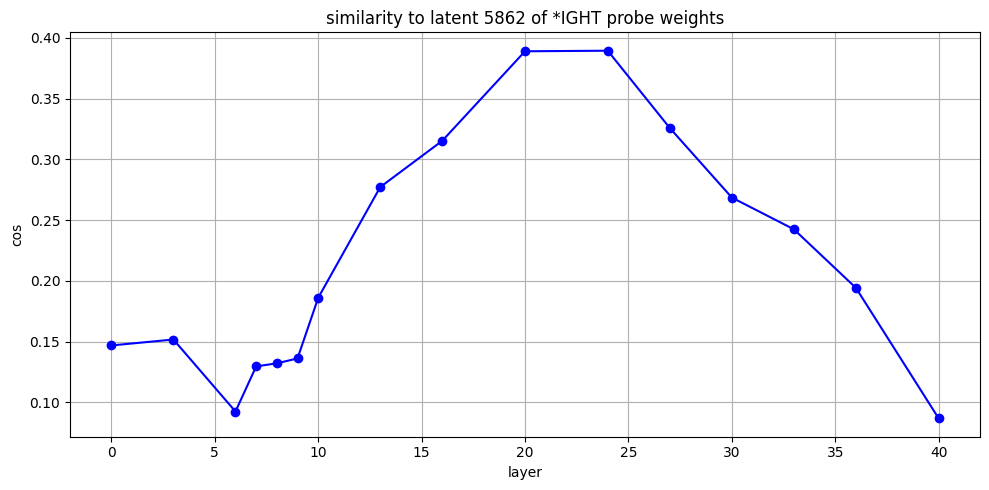

In [68]:
import matplotlib.pyplot as plt
lineplot(night_to_nightlatentdata,f'similarity to latent 5862 of *IGHT probe weights')

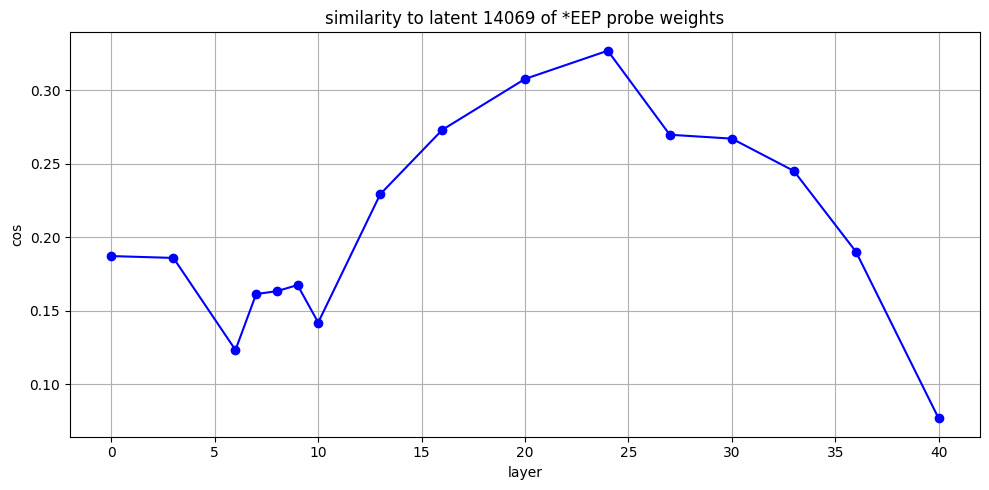

In [70]:
lineplot(deep_to_deeplatentdata,f'similarity to latent 14069 of *EEP probe weights')

In [71]:
with open("feature_to_decoder.json","r") as f: 
    feature_to_decoder=json.load(f)

In [72]:
with open("line_catalog.json", 'r') as f:
    line_catalog=json.load(f)
len(line_catalog["pain_rhymes"])

100

In [74]:
def get_last_word(text,n):
    lines = text.split("\n")
    if len(lines) < n+1:
        print(f"Failed to get last word: {text}")
        return ""
    second_line = lines[n]
    second_line_words = second_line.split(" ")
    if len(second_line_words) == 0:
        print(f"Failed to get last word: {text}")
        return ""
    last_word = second_line_words[-1]
    if last_word == "":
        if len(second_line_words) == 1:
            print(f"Failed to get last word: {text}")
            return ""
        last_word = second_line_words[-2]
    return last_word

In [76]:
from collections import Counter

def top_rhymes(rclass):
    c=Counter([get_last_word("\n\n"+k,2) for k in line_catalog[rclass]])
    return [x for x,y in c.items() if y>1]


top_pain_rhymes=top_rhymes("pain_rhymes")
top_quick_rhymes=top_rhymes("slick_rhymes")
top_night_rhymes=top_rhymes("night_rhymes")
top_deep_rhymes=top_rhymes("sleep_rhymes")

In [77]:
top_night_rhymes

['night',
 'height',
 'bright',
 'sight',
 'might',
 'flight',
 'light',
 'right',
 'fight',
 'tight']

In [ ]:
px.line(
    cache["blocks.20.hook_resid_post.hook_sae_acts_post"][0, -1, :].cpu().numpy(),
    title="Feature activations at the final token position",
    labels={"index": "Feature", "value": "Activation"},
).show()

In [119]:
from tqdm import tqdm
from functools import partial


def find_max_activation(model, sae, activation_store, feature_idx, num_batches=100):
    """
    Find the maximum activation for a given feature index. This is useful for
    calibrating the right amount of the feature to add.
    """
    max_activation = 0.0

    pbar = tqdm(range(num_batches))
    for _ in pbar:
        tokens = activation_store.get_batch_tokens()

        _, cache = model.run_with_cache(
            tokens,
            stop_at_layer=sae.cfg.hook_layer + 1,
            names_filter=[sae.cfg.hook_name],
        )
        sae_in = cache[sae.cfg.hook_name]
        feature_acts = sae.encode(sae_in).squeeze()

        feature_acts = feature_acts.flatten(0, 1)
        batch_max_activation = feature_acts[:, feature_idx].max().item()
        max_activation = max(max_activation, batch_max_activation)

        pbar.set_description(f"Max activation: {max_activation:.4f}")

    return max_activation


def steering(
    activations, hook, steering_strength=1.0, steering_vector=None, max_act=1.0
):
    # Note if the feature fires anyway, we'd be adding to that here.
    return activations + max_act * steering_strength * steering_vector


def generate_with_steering(
    model,
    sae,
    prompt,
    steering_feature,
    max_act,
    steering_strength=1.0,
    max_new_tokens=95,
):
    input_ids = model.to_tokens(prompt, prepend_bos=sae.cfg.prepend_bos)

    steering_vector = sae.W_dec[steering_feature].to(model.cfg.device)

    steering_hook = partial(
        steering,
        steering_vector=steering_vector,
        steering_strength=steering_strength,
        max_act=max_act,
    )

    # standard transformerlens syntax for a hook context for generation
    with model.hooks(fwd_hooks=[(sae.cfg.hook_name, steering_hook)]):
        output = model.generate(
            input_ids,
            max_new_tokens=max_new_tokens,
            temperature=0.7,
            #top_p=0.9,
            stop_at_eos=False if device == "mps" else True,
            prepend_bos=sae.cfg.prepend_bos,
        )

    return model.tokenizer.decode(output[0])




# note we could also get the max activation from Neuronpedia (https://www.neuronpedia.org/api-doc#tag/lookup/GET/api/feature/{modelId}/{layer}/{index})

# Generate text without steering for comparison
prompt = "A rhymed couplet:\nThrough muddy fields we trudged with walking stick\n"
normal_text = model.generate(
    prompt,
    max_new_tokens=30,
    temperature=0.7,
    stop_at_eos=False if device == "mps" else True,
    prepend_bos=sae.cfg.prepend_bos,
)

print("\nNormal text (without steering):")
print(normal_text)

# Generate text with steering
steered_text = generate_with_steering(
    model, sae, prompt, steering_feature, 70, steering_strength=2.0, max_new_tokens=30
)

# Choose a feature to steer
steering_feature = lightindices[4]  # Choose a feature to steer towards

print(f"Steered text with latent {steering_feature}:")
print(steered_text)

print("*"*40)
# Choose a feature to steer
steering_feature = lightindices[1]  # Choose a feature to steer towards

print(f"Steered text with latent {steering_feature}:")
steered_text = generate_with_steering(
    model, sae, prompt, steering_feature, 70, steering_strength=2.0, max_new_tokens=30
)
print("Steered text:")
print(steered_text)

  0%|          | 0/30 [00:00<?, ?it/s]


Normal text (without steering):
A rhymed couplet:
Through muddy fields we trudged with walking stick
and saw a horse, a man and a donkey kick
They were all galloping and running fast
With fear of being caught in the mud.




  0%|          | 0/30 [00:00<?, ?it/s]

Steered text with latent 5862:
<bos>A rhymed couplet:
Through muddy fields we trudged with walking stick
Then out of nowhere, a light appeared.

It was a beautiful night.
I sat at the table and read a book.
The book
****************************************
Steered text with latent 13013:


  0%|          | 0/30 [00:00<?, ?it/s]

Steered text:
<bos>A rhymed couplet:
Through muddy fields we trudged with walking stick
In a dark spot we watched the night
We were walking along the path in a dark spot
We were walking along the path in a dark spot
